# Categorical analysis of Course Description 

In [10]:
pip install pandas matplotlib seaborn openpyxl

In [6]:
import pandas as pd

In [9]:
df = pd.read_excel("C:/Users/gupta/Python jypter notebook/Data/Course Description.xlsx")

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   School             100 non-null    object
 1   Title of Courses   100 non-null    object
 2   Course Decription  99 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB
None


In [12]:
print(df.head())

                                              School  \
0                           University of St. Gallen   
1                                          HEC Paris   
2  Rotterdam School of Management, Erasmus Univer...   
3                      Stockholm School of Economics   
4                               ESCP Business School   

                                    Title of Courses  \
0  Master of Arts in Strategy and International M...   
1                               Master in Management   
2                MSc International Management / CEMS   
3           Master program in International Business   
4                              Masters in Management   

                                   Course Decription  
0  With a challenging curriculum that combines th...  
1  For more than a century, our history of academ...  
2  Are you keen to become a responsible business ...  
3  Lead, collaborate, inspire and be inspired. Ma...  
4  At ESCP Business School, we believe business c..

In [13]:
print(df.describe(include='object'))

                          School      Title of Courses  \
count                        100                   100   
unique                       100                    56   
top     University of St. Gallen  Master in Management   
freq                           1                    18   

                                        Course Decription  
count                                                  99  
unique                                                 99  
top     With a challenging curriculum that combines th...  
freq                                                    1  


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
school_counts = df['School'].value_counts()

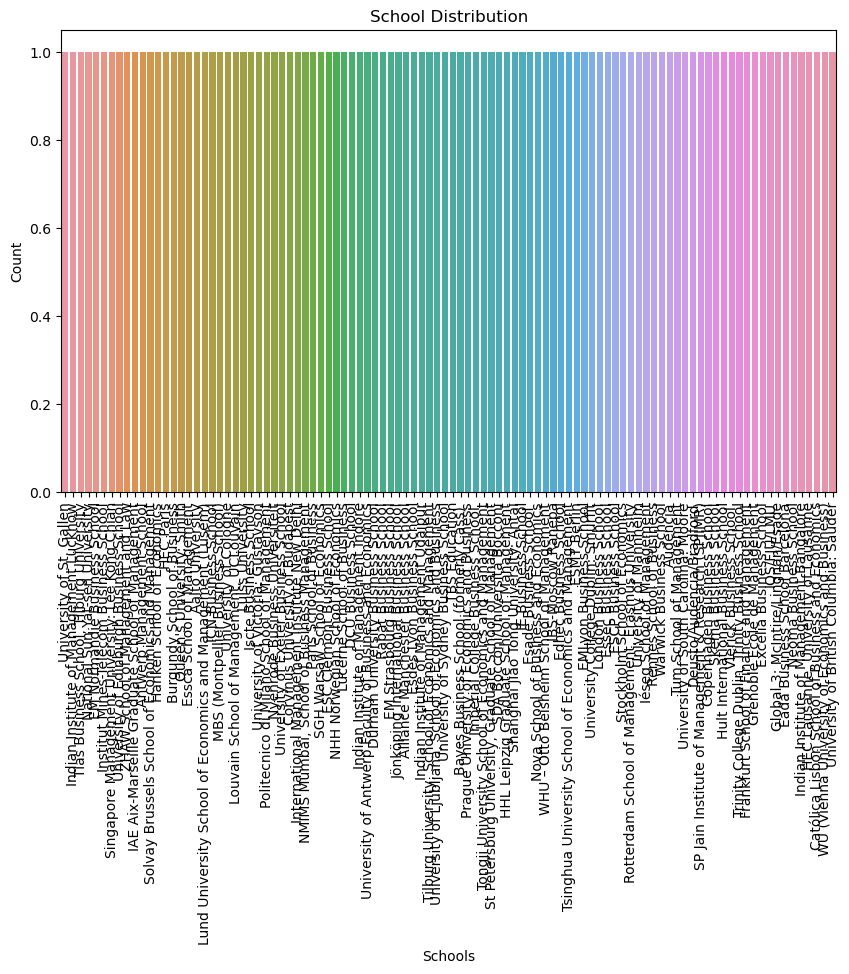

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=school_counts.index, y=school_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Schools')
plt.ylabel('Count')
plt.title('School Distribution')
plt.show()

In [18]:
Title_of_course_count = df['Title of Courses'].value_counts()

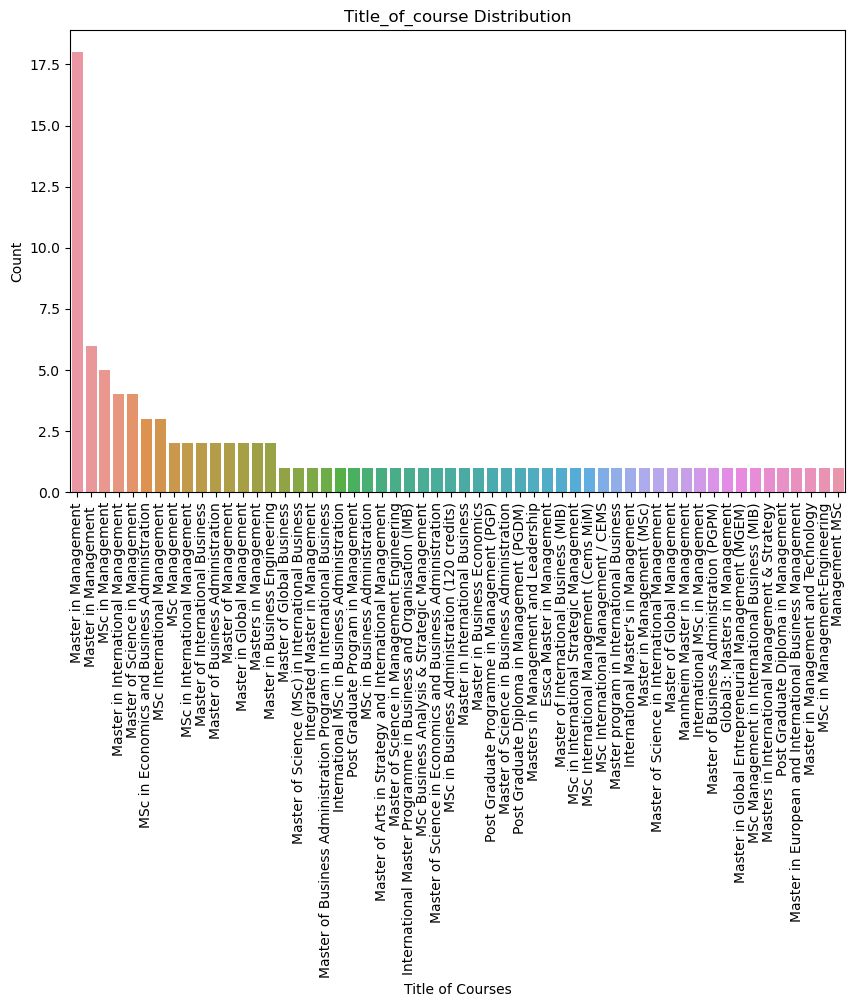

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Title_of_course_count.index, y=Title_of_course_count.values)
plt.xticks(rotation=90)
plt.xlabel('Title of Courses)
plt.ylabel('Count')
plt.title('Title_of_course Distribution')
plt.show()

#### Clustering Analysis on Course Descriptions

To address this issue, you can perform data preprocessing to handle missing values before applying the TF-IDF vectorization. Here's how you can do it:

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer  


 Fill missing values with an empty string or any other suitable placeholder

In [30]:
df['Course Decription'].fillna('', inplace=True)

Initialize the TF-IDF vectorizer

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, max_df=0.85)

Fit and transform the data

In [32]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Course Decription'])

In [35]:
from sklearn.cluster import KMeans

num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, n_init=10)  # Explicitly set n_init
kmeans.fit(tfidf_matrix)
df['cluster'] = kmeans.labels_

In [36]:
cluster_labels = df['cluster']

# Display the cluster assignments
print(cluster_labels)

0     1
1     4
2     0
3     3
4     0
     ..
95    0
96    4
97    3
98    3
99    2
Name: cluster, Length: 100, dtype: int32


In [37]:
cluster_counts = cluster_labels.value_counts()
print(cluster_counts)

3    31
0    29
1    17
4    15
2     8
Name: cluster, dtype: int64


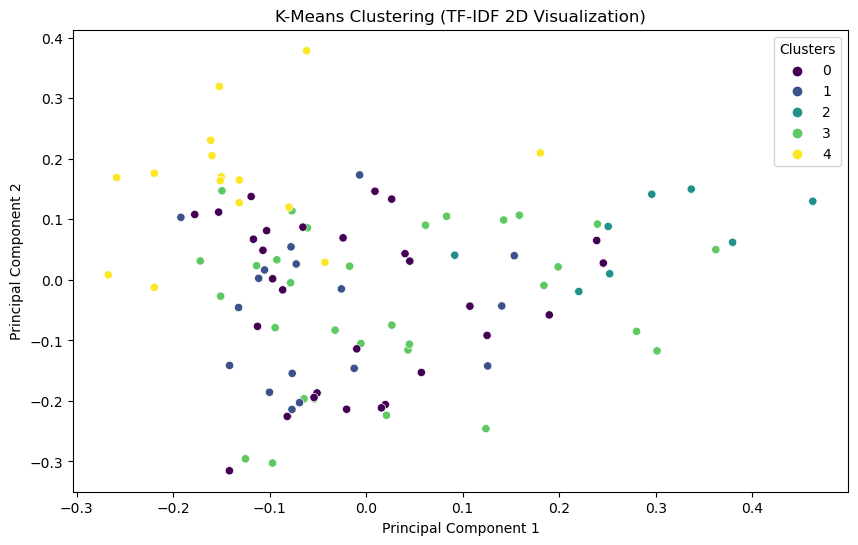

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already performed K-Means clustering and assigned labels
# Access the cluster labels in the DataFrame
cluster_labels = df['cluster']

# Create a PCA instance to reduce TF-IDF features to 2D
pca = PCA(n_components=2)  # You can choose 2 or 3 components for 2D or 3D visualization

# Fit and transform the TF-IDF matrix to 2D using PCA
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

# Create a scatterplot with different colors for each cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tfidf_2d[:, 0], y=tfidf_2d[:, 1], hue=cluster_labels, palette='viridis')
plt.title('K-Means Clustering (TF-IDF 2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.show()

#### Text Preprocessing for Text Analysis and Natural Language Processing (NLP) 

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing stopwords and punctuation
    clean_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token not in string.punctuation]
    return ' '.join(clean_tokens)

df['cleaned_description'] = df['Course Decription'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Keyword Extraction

In [43]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk import FreqDist
from nltk.util import ngrams
from nltk.probability import FreqDist
import string

# Tokenize and preprocess the text (assuming 'cleaned_description' contains preprocessed text)
text = ' '.join(df['cleaned_description'])

# Tokenize the text into words
tokens = word_tokenize(text)

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token not in string.punctuation]

# Extract keywords using TextRank algorithm
from nltk.probability import FreqDist
from nltk.util import ngrams

# Get bigrams
bigrams = list(ngrams(filtered_tokens, 2))

# Calculate frequency distribution
fdist = FreqDist(bigrams)

# Get the most common bigrams as keywords
keywords = [item for item in fdist.most_common(10)]  # Change '10' to the number of keywords you want

print("Keywords:", keywords)

Keywords: [(('master', 'management'), 27), (('international', 'business'), 15), (('international', 'management'), 11), (('business', 'management'), 9), (('business', 'school'), 8), (('master', 'science'), 8), (('global', 'business'), 8), (('programme', 'designed'), 7), (('master', '’'), 6), (('management', 'program'), 6)]


Text Summarization

In [45]:
pip install nltk gensim

     ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
     ---------------------------------------- 67.1/67.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=89243161a5ad31ddbdab1badaf0370e8a0011f508a89f44113667e06554c1a5d
  Stored in directory: c:\users\gupta\appdata\local\pip\cache\wheels\69\f5\e5\18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3522 sha256=5370033a8566083a136b175ef63906093cfb15081a43c2d0a270a1a0672910c2
  Stored in directory: c:\users\gupta\appdata\local\pip\cache\wheels\9d\ff\2f\afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Successfully built fst-pso miniful
Note: you may need to restart the kernel to use 

In [48]:
pip install sumy

     ---------------------------------------- 0.0/97.3 kB ? eta -:--:--
     ----------------------------- ---------- 71.7/97.3 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 97.3/97.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
     ---------------------------------------- 0.1/10.1 MB 6.8 MB/s eta 0:00:02
     - -------------------------------------- 0.4/10.1 MB 4.6 MB/s eta 0:00:03
     - -------------------------------------- 0.5/10.1 MB 3.9 MB/s eta 0:00:03
     -- ------------------------------------- 0.7/10.1 MB 4.1 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/10.1 MB 5.1 MB/s eta 0:00:02
     ----- ---------------------------------- 1.3/10.1 MB 5.3 MB/s eta 0:00:02
     ------- -----

In [50]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer  # You can also choose other summarization algorithms

# Assuming 'cleaned_description' contains preprocessed text
text = ' '.join(df['cleaned_description'])

# Create a plaintext parser
parser = PlaintextParser.from_string(text, Tokenizer("english"))

# Initialize the LsaSummarizer (or choose another summarization algorithm)
summarizer = LsaSummarizer()

# Generate a summary with a specified number of sentences
summary = summarizer(parser.document, sentences_count=3)  # You can adjust the number of sentences in the summary

# Print the summary
for sentence in summary:
    print(sentence)


several electives also offered “ à la carte ” allowing students personalized courses master cycle therefore cycle knowledge enhancement also open-mindedness contributing training innovative inspiring ethical leaders newly updated one-year msc management course shows path ambitious graduate take become successful manager world business master ’ program international management/cems exclusive international joint degree program offered wu cooperation cems alliance divided “ wu year ” “ cems year.
” decide year want first one best master 's programs world international master science management highly selective program solid international scope offers high-quality graduate education business curriculum program experience designed provide relevant practical academic knowledge become launchpad international career master science msc management 4 specific orientations strategy organization leadership marketing business analytics behaviour economics evolution post graduate programme management

Named Entity Recognition (NER) 

In [56]:
%pip install -U pip setuptools wheel
%pip install -U spacy

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
  Using cached setuptools-68.2.2-py3-none-any.whl.metadata (6.3 kB)
  Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/b8/8b/31273bf66016be6ad22bb7345c37ff350276cfd46e389a0c2ac5da9d9073/wheel-0.41.2-py3-none-any.whl.metadata
  Using cached wheel-0.41.2-py3-none-any.whl.metadata (2.2 kB)
Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
Using cached wheel-0.41.2-py3-none-any.whl (64 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.38.4
    Uninstalling wheel-0.38.4:
      Successfully uninstalled wheel-0.38.4
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.0.0
    Uninstalling setuptools-68.0.0:
      Successfully uninstalled setuptools-68.0.0
Note: you may need to restart the ker

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


In [57]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 1.4 MB/s eta 0:00:10
     ---------------------------------------- 0.1/12.8 MB 1.7 MB/s eta 0:00:08
      --------------------------------------- 0.3/12.8 MB 2.1 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.8 MB 2.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/12.8 MB 3.3 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/12.8 MB 3.9 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/12.8 MB 4.4 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 4.6 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 5.1 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.8 MB 5.0 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.8 MB 4.9 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.8 MB 4

In [58]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Assuming 'cleaned_description' contains preprocessed text
text = ' '.join(df['cleaned_description'])

# Process the text with spaCy
doc = nlp(text)

# Extract named entities and their types
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print the named entities and their types
for entity, entity_type in entities:
    print(f"Entity: {entity}, Type: {entity_type}")


Entity: today, Type: DATE
Entity: century, Type: DATE
Entity: paris, Type: GPE
Entity: mim, Type: ORG
Entity: 70,000, Type: CARDINAL
Entity: second year, Type: DATE
Entity: escp master management expand horizons benefit, Type: ORG
Entity: one, Type: CARDINAL
Entity: one, Type: CARDINAL
Entity: mim, Type: PERSON
Entity: 1907, Type: DATE
Entity: today, Type: DATE
Entity: mim, Type: PERSON
Entity: 16-month, Type: DATE
Entity: september year, Type: DATE
Entity: 24 months, Type: DATE
Entity: mim, Type: ORG
Entity: mim, Type: ORG
Entity: two-year, Type: DATE
Entity: second, Type: ORDINAL
Entity: year year, Type: DATE
Entity: russian, Type: NORP
Entity: mim, Type: PERSON
Entity: today, Type: DATE
Entity: germany, Type: GPE
Entity: three, Type: CARDINAL
Entity: russia, Type: GPE
Entity: russian, Type: NORP
Entity: chinese, Type: NORP
Entity: msc international management, Type: ORG
Entity: mannheim mim, Type: PERSON
Entity: university mannheim business school germany, Type: ORG
Entity: one-year